In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
house_prices = pd.read_csv('data/house_prices/house_prices.csv')

x = house_prices[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']]
y = house_prices[['SalePrice']]

from sklearn import model_selection
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 123456)

In [3]:
#training
dtree = tree.DecisionTreeRegressor(max_depth = 3)
dtree.fit(train_x, train_y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [4]:
#Test set validation
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = dtree.predict(test_x)

explained_variance_score(test_y, y_pred)

mean_absolute_error(test_y, y_pred)

mean_squared_error(test_y, y_pred)

r2_score(test_y, y_pred)

0.6849031906015663

30485.044353423196

2149873394.158856

0.6847199777400546

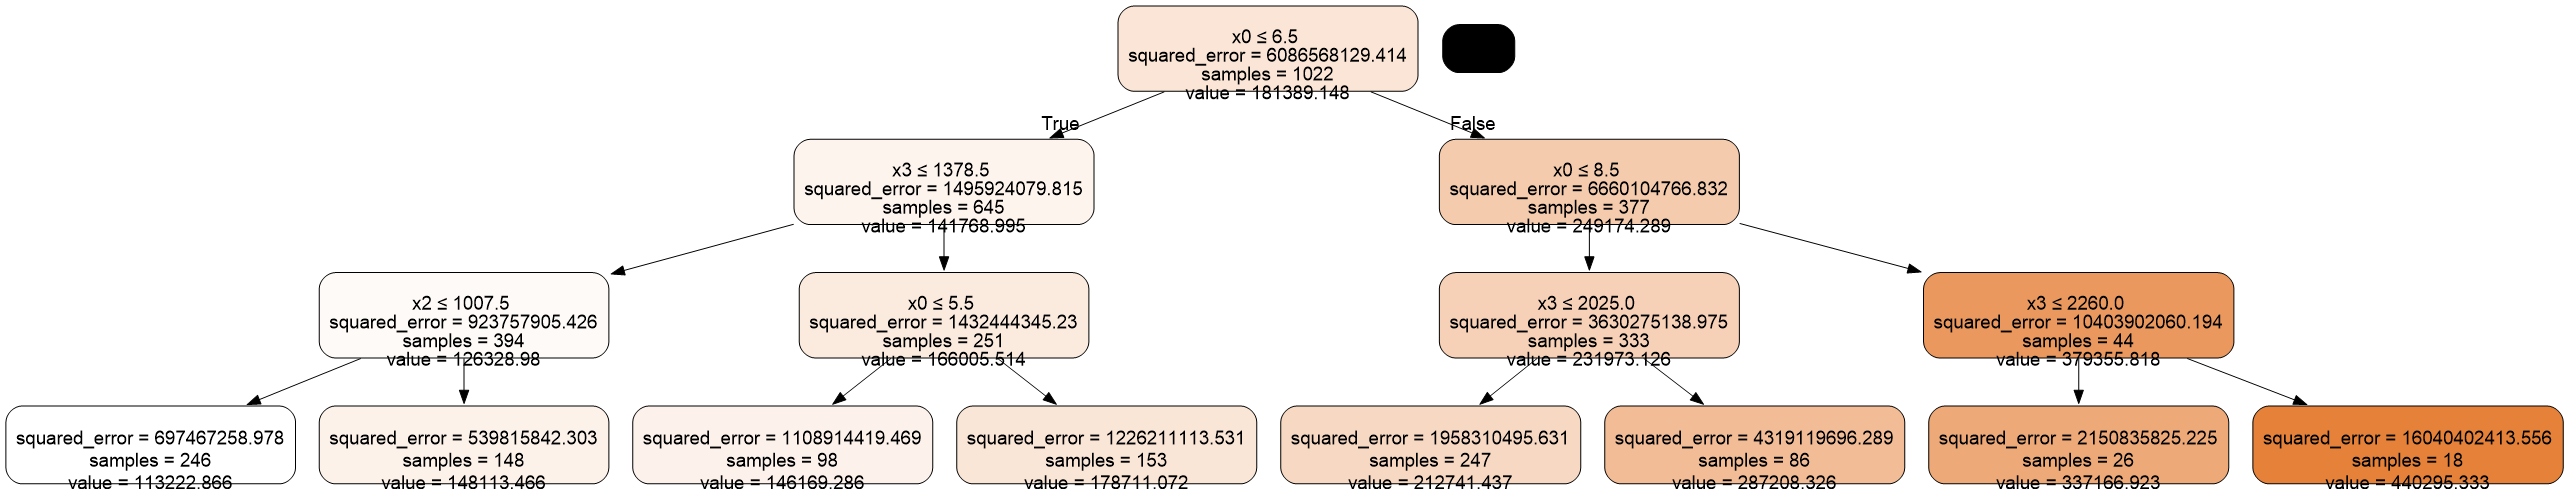

In [5]:
# check
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(dtree, out_file = None,
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())